In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
Data = pd.read_csv("606 dataset.csv")

In [105]:
Data.head(3) #checking the dataframe

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,Category,daystakentoupdate
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25 00:52:42+00:00,2018-02-05 08:36:58+00:00,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.03E+11,Movies,195
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25 05:16:03+00:00,2018-02-05 11:27:45+00:00,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,Food,195
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25 05:16:03+00:00,2018-02-05 11:27:45+00:00,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,Food,195


In [4]:
Data.shape #checking the shape of the dataframe

(71044, 25)

In [5]:
Data.dtypes #checking the datatypes of each column in dataframe

id                       object
brand                    object
categories               object
dateAdded                object
dateUpdated              object
ean                      object
keys                     object
manufacturer             object
manufacturerNumber       object
name                     object
reviews.date             object
reviews.dateAdded        object
reviews.dateSeen         object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating            int64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.userProvince     object
reviews.username         object
upc                      object
dtype: object

<AxesSubplot:>

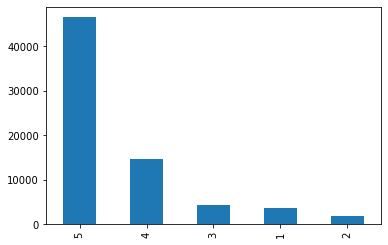

In [13]:
#reviews.rating
Data['reviews.rating'].value_counts().plot.bar() 

- It can be observed that within the range of ratings from 1 to 5,the frequency of reviews is at its lowest point for a rating of 2.
- One can note that the frequency of reviews is highest for a rating of 5 within the range of ratings from 1 to 5.

<AxesSubplot:>

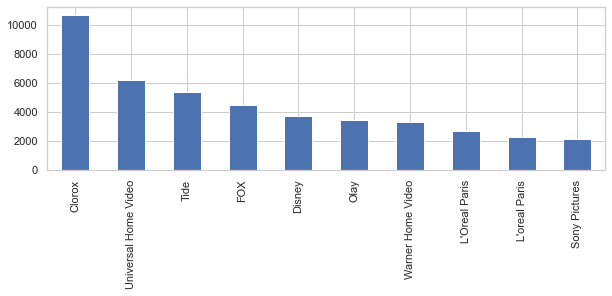

In [23]:
#brand
Data['brand'].value_counts().head(10).plot.bar(figsize = (10,3))

- It is evident that Clorox stands out as a leading brand, outperforming other brands with its high customer ratings and maximum sales figures
- Universal Home Video holds the position of the second most recognized brand on a scale of 1 to 10 brands.

<AxesSubplot:>

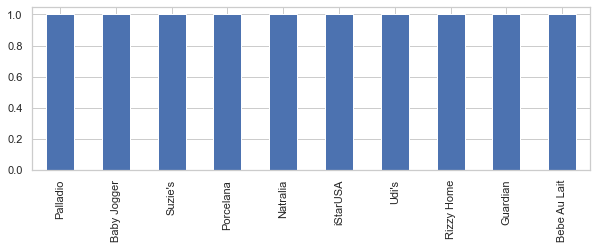

In [24]:
Data['brand'].value_counts().tail(10).plot.bar(figsize = (10,3))

- This plot represents brands with low ratings and minimal recognition.


In [127]:
Data['reviews.userCity'].nunique()

2282

- There is a total of 2282 cities where product reviews are predominantly written by users.

<AxesSubplot:>

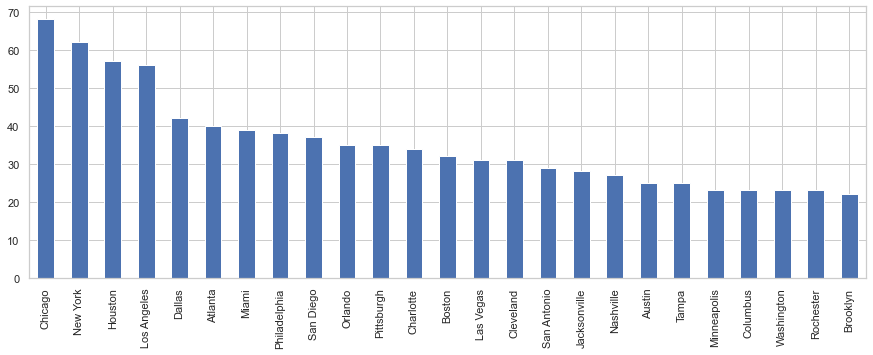

In [130]:
Data['reviews.userCity'].value_counts().head(25).plot.bar(figsize = (15,5))

- In the case of Chicago, it is evident that people are highly engaged in reviewing product details and rating the products they have purchased from the brand's various categories.

<AxesSubplot:>

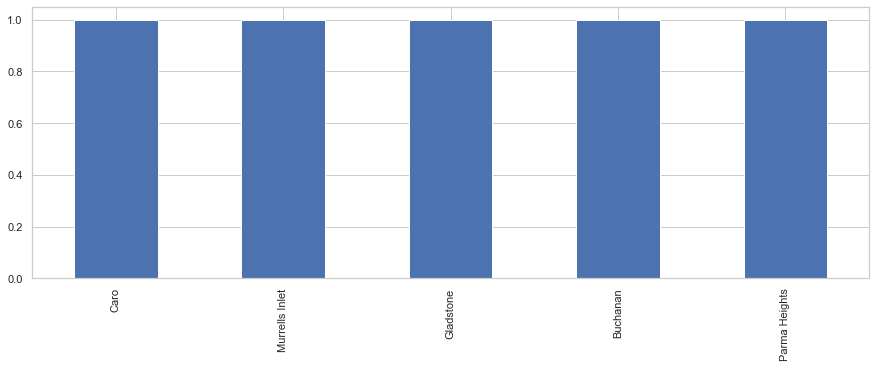

In [137]:
Data['reviews.userCity'].value_counts().tail(5).plot.bar(figsize = (15,5))

<AxesSubplot:ylabel='Frequency'>

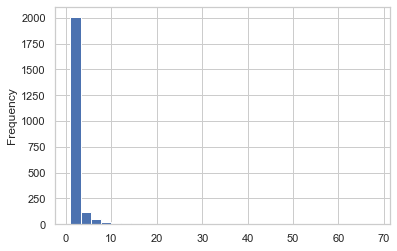

In [139]:
Data['reviews.userCity'].value_counts().plot.hist(bins = 30)

- minimum number of users per city is one maximum is around  70 users 
- but frequency of cities having number of users greater than 10 is very low 


<AxesSubplot:>

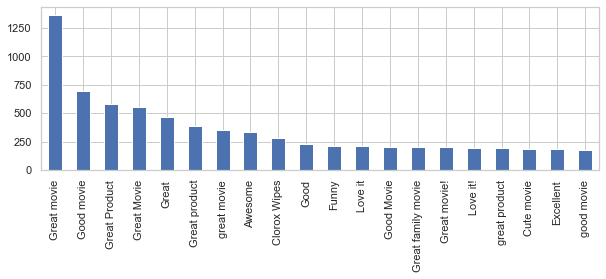

In [111]:
Data['reviews.title'].value_counts().head(20).plot.bar(figsize = (10,3))

In [48]:
Data['dateAdded']

0        2017-07-25T00:52:42Z
1        2017-07-25T05:16:03Z
2        2017-07-25T05:16:03Z
3        2017-07-25T16:26:19Z
4        2017-07-25T16:26:19Z
                 ...         
71039    2017-06-22T18:37:24Z
71040    2017-06-22T18:37:24Z
71041    2017-06-22T18:37:24Z
71042    2017-06-28T15:23:21Z
71043    2017-06-28T15:35:50Z
Name: dateAdded, Length: 71044, dtype: object

In [50]:
Data['dateAdded'] = pd.to_datetime(Data['dateAdded'])

- using pandas, the object type datatype in this column (dateAdded) has been transformed to datetime.

In [52]:
Data['dateUpdated']

0        2018-02-05T08:36:58Z
1        2018-02-05T11:27:45Z
2        2018-02-05T11:27:45Z
3        2018-02-05T11:25:51Z
4        2018-02-05T11:25:51Z
                 ...         
71039    2018-02-05T11:28:36Z
71040    2018-02-05T11:28:36Z
71041    2018-02-05T11:28:36Z
71042    2018-02-05T10:19:41Z
71043    2018-02-05T10:21:34Z
Name: dateUpdated, Length: 71044, dtype: object

In [54]:
Data['dateUpdated'] = pd.to_datetime(Data['dateUpdated'])

- here column(dateUpdated) is object type datatype which is now changed to datetime using pandas

In [65]:
(Data['dateUpdated'] - Data['dateAdded']).dt.days

0        195
1        195
2        195
3        194
4        194
        ... 
71039    227
71040    227
71041    227
71042    221
71043    221
Length: 71044, dtype: int64

- Here, we can see that the difference between the dataupdated and dateAdded fields allows us to estimate the number of days it takes to update the product. 

In [140]:
Data['daystakentoupdate'] = (Data['dateUpdated'] - Data['dateAdded']).dt.days

- We created a new column named "daystakentoupdate" to provide a clear indication of the duration required to update each product listed in a row.

<AxesSubplot:ylabel='Frequency'>

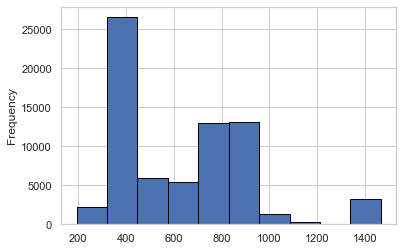

In [141]:
Data['daystakentoupdate'].plot(kind='hist', edgecolor='black')

- It is noticeable that there is a small number of updated products between the range of 200 and 300. 
- Currently, the range between 300 and 400 contains the highest amount of products that receive frequent updates.
- Based on the plot above, it can be inferred that products typically begin receiving updates after a period of 200 days.
- Overall, there exist certain products that receive updates after a duration of 1300 days.
- On average, the products undergo updates within the range of 700 to 900 days.

<AxesSubplot:xlabel='daystakentoupdate', ylabel='Count'>

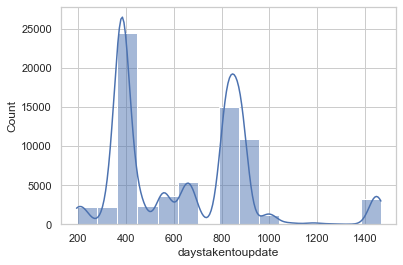

In [73]:
sns.histplot(Data['daystakentoupdate'],kde = True ,bins = 15)

- we can see that there is no paticular factor to update products.
- lets dive in more and see on what bases theproducts are updated.

In [96]:
top_brands = Data['brand'].value_counts().sort_values(ascending = False)[0:10].index.to_list()

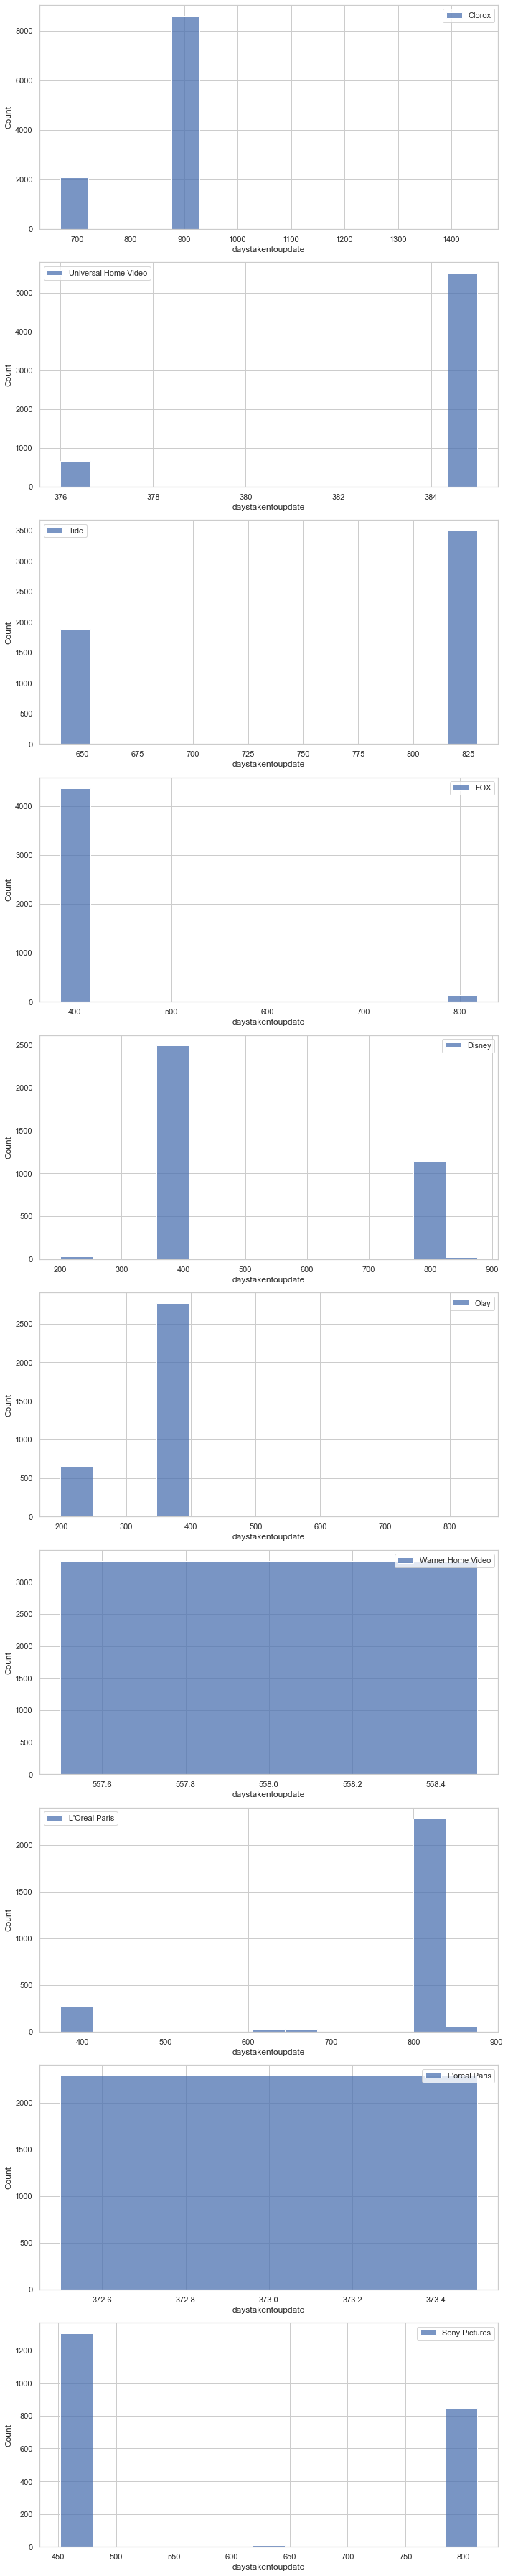

In [103]:
fig, ax = plt.subplots(len(top_brands),1, figsize = (10, len(top_brands)*5))
i = 0
for brand in top_brands:
    sns.histplot(data = Data[Data['brand'] == brand], x = 'daystakentoupdate', ax = ax[i], label = brand)
    ax[i].legend(loc = 'best')
    i += 1
    
plt.tight_layout()

- products are updated based on brands 
- these are the top 10 brands 


In [81]:
Data['manufacturer'].nunique()

463

- here there are 463 manufacturer

<AxesSubplot:>

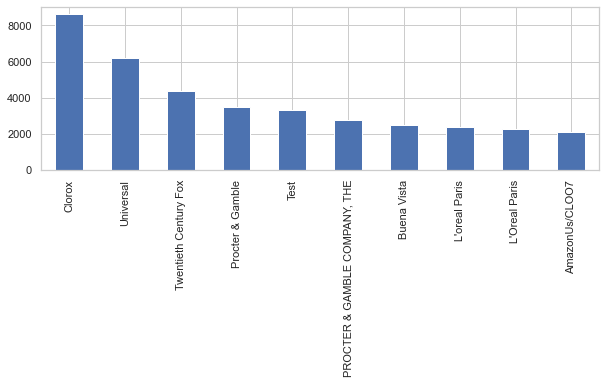

In [85]:
Data['manufacturer'].value_counts().head(10).plot.bar(figsize = (10,3))

- There is not much variation between the manufacturer and brand.
- Some manufacturers and brands are identical.
- Overall, it can be observed that certain products have different brands and manufacturers.

<AxesSubplot:>

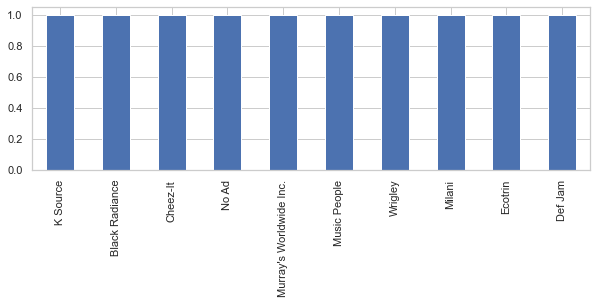

In [86]:
Data['manufacturer'].value_counts().tail(10).plot.bar(figsize = (10,3))

In [21]:
# Function which returns DataFrame containing count and percentage of null values for each column
def null(dataframe):
    temp_series = dataframe.isna().sum(axis = 0)
    df_null = pd.DataFrame([temp_series, round(temp_series * 100/ dataframe.shape[0], 2)], index = ['Count', 'Percentage']).T.sort_values('Percentage', ascending = False)
    return df_null

In [22]:
null(Data)

,Count,Percentage
reviews.userProvince,70595.0,99.37
reviews.userCity,65634.0,92.39
reviews.didPurchase,38886.0,54.74
reviews.id,38886.0,54.74
reviews.numHelpful,38536.0,54.24
ean,31979.0,45.01
reviews.doRecommend,10615.0,14.94
reviews.title,476.0,0.67
manufacturerNumber,203.0,0.29
manufacturer,141.0,0.20


- It is noticeable that the columns "reviews.userProvince" and "reviews.userCity" contain a significant number of null values.